In [3]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [4]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank_data.shape

(45211, 17)

In [6]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
bank_data['job'] = le.fit_transform(bank_data[['job']])
bank_data['marital'] = le.fit_transform(bank_data[['marital']])
bank_data['education'] = le.fit_transform(bank_data[['education']])
bank_data['default'] = le.fit_transform(bank_data[['default']])
bank_data['housing'] = le.fit_transform(bank_data[['housing']])
bank_data['loan'] = le.fit_transform(bank_data[['loan']])
bank_data['contact'] = le.fit_transform(bank_data[['contact']])
bank_data['month'] = le.fit_transform(bank_data[['month']])
bank_data['poutcome'] = le.fit_transform(bank_data[['poutcome']])
bank_data['y'] = le.fit_transform(bank_data[['y']])
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [10]:
bank_data.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

## Model Building

In [11]:
x = bank_data.drop(labels='y',axis=1)
y = bank_data[['y']]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [13]:
x_train.shape,y_train.shape

((36168, 16), (36168, 1))

In [14]:
x_test.shape,y_test.shape

((9043, 16), (9043, 1))

## Model Training

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

## Model Testing

In [16]:
y_pred_train = logistic_reg.predict(x_train)

In [17]:
y_pred_test = logistic_reg.predict(x_test)

## Model Evaluation

In [18]:
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [19]:
print('confusion matrix is \n',confusion_matrix(y_train,y_pred_train))

confusion matrix is 
 [[31351   578]
 [ 3511   728]]


In [20]:
print('classification report is \n',classification_report(y_train,y_pred_train))

classification report is 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [21]:
print('confusion matrix is \n',confusion_matrix(y_test,y_pred_test))

confusion matrix is 
 [[7848  145]
 [ 852  198]]


In [22]:
print('classification report is \n',classification_report(y_test,y_pred_test))

classification report is 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



0.5852152776536613


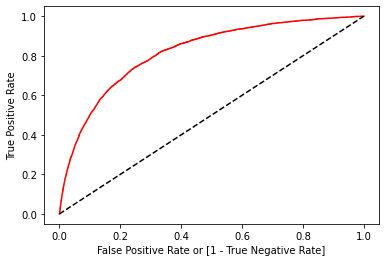

In [23]:
fpr, tpr, thresholds = roc_curve(y, logistic_reg.predict_proba (x)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

## Imbalance dataset

In [24]:
bank_data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

_Observation_

The number of 'yes' in output y is comparatively low than 'no'. So there is imbalance in dataset which will lead to reduce in accuracy.
Hence we have to balance the dataset

## Oversampling by SMOTE technique

In [26]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_smt,y_smt = smt.fit_resample(x,y)

In [27]:
x_smt.shape,y_smt.shape

((79844, 16), (79844, 1))

## Model Building

In [28]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt = train_test_split(x_smt,y_smt,test_size=0.20,random_state=12)

## Model Training

In [30]:
logistic_reg1 = LogisticRegression()
logistic_reg1.fit(x_train_smt,y_train_smt)

LogisticRegression()

## Model Testing

In [31]:
y_pred_train_smt = logistic_reg1.predict(x_train_smt)

In [32]:
y_pred_test_smt = logistic_reg1.predict(x_test_smt)

## Model Evaluation

In [33]:
print('confusion matrix is \n',confusion_matrix(y_train_smt,y_pred_train_smt))

confusion matrix is 
 [[25909  6072]
 [ 6962 24932]]


In [34]:
print('classification report is \n',classification_report(y_train_smt,y_pred_train_smt))

classification report is 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     31981
           1       0.80      0.78      0.79     31894

    accuracy                           0.80     63875
   macro avg       0.80      0.80      0.80     63875
weighted avg       0.80      0.80      0.80     63875



In [35]:
print('confusion matrix is \n',confusion_matrix(y_test_smt,y_pred_test_smt))

confusion matrix is 
 [[6454 1487]
 [1767 6261]]


In [36]:
print('classification report is \n',classification_report(y_test_smt,y_pred_test_smt))

classification report is 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      7941
           1       0.81      0.78      0.79      8028

    accuracy                           0.80     15969
   macro avg       0.80      0.80      0.80     15969
weighted avg       0.80      0.80      0.80     15969



0.7963196765608244


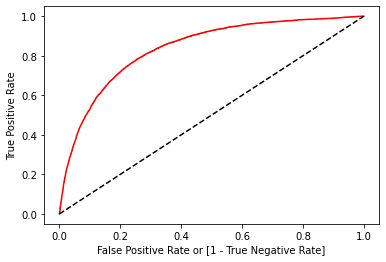

In [37]:
fpr, tpr, thresholds = roc_curve(y, logistic_reg1.predict_proba (x)[:,1])

auc = roc_auc_score(y_test_smt,y_pred_test_smt)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()